<a href="https://colab.research.google.com/github/emilyclifton/ML-Mushrooms/blob/main/mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Background:
###Introduction
Mushrooms are a diverse group of fungi that have been apart of human diets and traditional medicines for centuries. The vast array of mushroom spieces presents both culinary delights and potential dangers, with certain mushrooms being highly toxic and even lethal if consummed. In this context, the ability to accurately identify whether a mushroom is edible or poisonous becomes paramount for the health of individuals who forage for mushrooms. Hopefully, with Machine Learning Algorithms this project will enchance the accuracy and efficiency of mushroom edibility classification.
###Literature Review
Historically, the identification of edible and poisonous mushrooms has relied on traditional knowledge passed down through generations. However, the limitations of this approach have become increasingly evident, prompting researchers to explore alternative methods. Previous literature has explored various techniques, including field guides, morphological characteristics, and chemical analyses, to distiguish between edible and poisonous mushrooms. Moreover, recent advancements in machine learning have offered new possibilities for automating and imporoving the accuracy of this classification process.
###Research Gaps
Despite the progress in traditional methods and the field of machine learning, there exists a notable research gap in developing robust models for mushroom edibility classification. The challenge lies in the dataset structure, where each mushroom species is labeled as definitely edible, definitely poisonous, or of unkown edibility and not recommended. The amalgamation of the "unkown edibility" class with the "poisonous" class introduces ambiguity, making it difficult to establish clear rules for identifying poisonous mushrooms based on available signs. This research gap calls for innovative approaches to address the inherent complexities within the dataset and improve the accuracy of edibility predictions.
###Challenges
One of the primary challenges in this project is navigating the dataset's classification nuances. The absence of distinct rules for identifying poisonous mushrooms poses a unique obstacle. Machine learning models must grapple with the uncertainty associated with the "unknown edibility" class, requiring strategies to enhance classification accuracy and mitigate the risks associated with false positives or false negatives. Overcoming these challenges is crucial to developing a reliable and practical tool for mushroom enthusiasts, foragers, and researchers alike.





##Project Description:

###Project Topic
This project aims to develop a machine learning model for the accurate classification of mushroom edibility. The dataset comprises descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms within the Agaricus and Lepiota Family. The challenge lies in effectively classifying these samples as definitely edible (e), definitely poisonous (p), or of unknown edibility and not recommended (combined with poisonous).

###Methodology
Employing advanced classification algorithms, such as neural networks or decision trees, the machine learning approach takes into account detailed descriptions of hypothetical samples. Variables such as cap shape, cap color, odor, gill size, and others derived from these descriptions contribute to the model's accuracy. Special attention is given to handling the "unknown edibility" class, taking into consideration the unique characteristics of the Agaricus and Lepiota Family samples.


###Data Resources
The dataset from the UC Irvine Machine Learning Repository provides comprehensive descriptions of hypothetical samples from 23 species of gilled mushrooms. Variables such as cap shape (bell, conical, convex, flat, knobbed, sunken), cap color (brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow), and others offer detailed insights into the morphological and chemical features of each mushroom species.
https://archive.ics.uci.edu/dataset/73/mushroom


###Anticipated Outcomes
The anticipated outcomes include the development of a robust machine learning model capable of accurately classifying mushrooms within the Agaricus and Lepiota Family. Performance evaluation metrics, such as precision, recall, and F1 score, will provide a comprehensive assessment of the model's effectiveness. The analysis of specific variables derived from the hypothetical samples will contribute to a nuanced understanding of the features influencing mushroom edibility.

##Performance Metrics:
| Metric | Mathematical Expression | Explanation |
| ---------- | ----------- | ----------- |
| $Accuracy$ | $= \dfrac{TP+TN}{TP+TN+FP+FN}$ | Measures the overall correctness of the model. |
| $Precision$ | $= \dfrac{TP}{TP+FP}$ | Evaluates the accuracy of positive predictions. |
| $Recall$ | $= \dfrac{TP}{TP+TN}$ | Assesses the model's ability to identify positive instances. |
| $F1$ | $= \dfrac{2\cdot Precision\cdot Recall}{Precision+Recall}$ | Provides a balanced measure that considers both false positives and false negatives. |
| $AUC-ROC$ | Area under the Receiver Operating Characteristic | Measures the model's ability to distiguish between edible and posionous. |

## Basic Data Exploration

### Initialize workspace

In [ ]:
# install the ucimlrepo package
!pip install ucimlrepo

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# import scikit modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


#### Load the Mushroom Dataset

In [ ]:
# fetch mushroom dataset from UCI repo
mushroom_data = fetch_ucirepo(id=73)

# load dataset into pandas df
# X = mushroom.data.features
# y = mushroom.data.targets

X = pd.DataFrame(mushroom_data.data.features, columns=mushroom_data.feature_names)
y = pd.DataFrame(mushroom_data.data.targets, columns=mushroom_data.target_names)

# display(X.head())
# display(y.head())

mushrooms = pd.concat([X, y], axis=1)

display(mushrooms.head())
mushrooms.info()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:
mushrooms.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [ ]:
mushrooms.nunique()

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
poisonous                    2
dtype: int64

### Calculations and Evaluations for EDA Questions

#### 1. Distribution of Edible and Poisonous Mushrooms:
- What is the overall percentage of edible mushrooms in the dataset?
- The primary goal is to understand the overall distribution of edible and poisonous mushrooms in the dataset. This will provide insights into the balance between the two classes and set the foundation for further analysis.

Percentage of Edible Mushrooms: 51.80%


Text(0.5, 1.0, 'Distribution of Mushrooms Across Habitats')

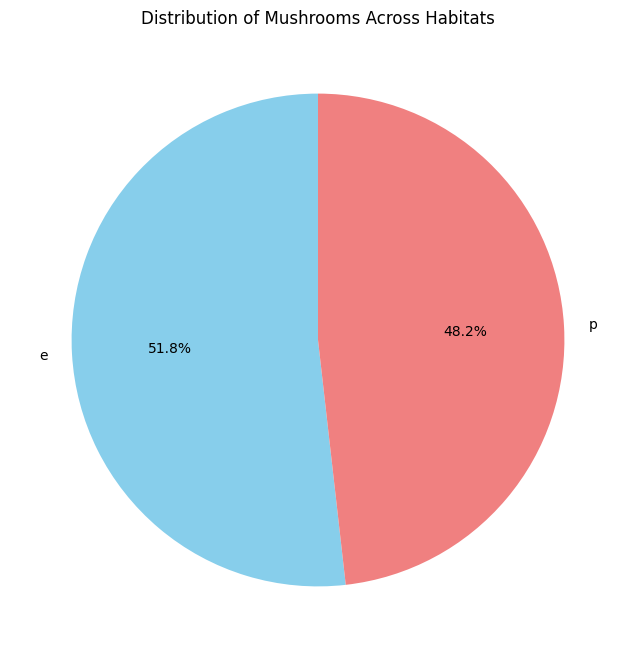

In [ ]:
# 1. Distribution of Edible and Poisonous Mushrooms
# Calculate the overall percentage of edible mushrooms
edible = y['poisonous'].value_counts()
edible_percentage = edible / len(y) * 100
print(f"Percentage of Edible Mushrooms: {edible_percentage.get('e', 0):.2f}%")

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(edible, labels=edible.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightyellow', 'lightgrey', 'lightblue'])
plt.title('Distribution of Mushrooms Across Habitats')

__Answer__: The dataset has a balanced distribution of edible and poisonous mushrooms, with approximately 51.8% being edible.

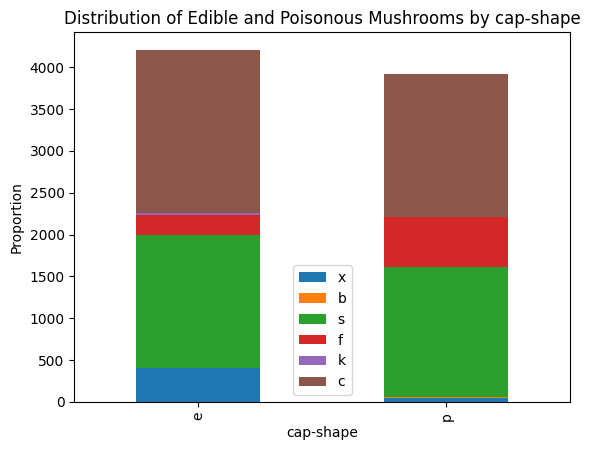

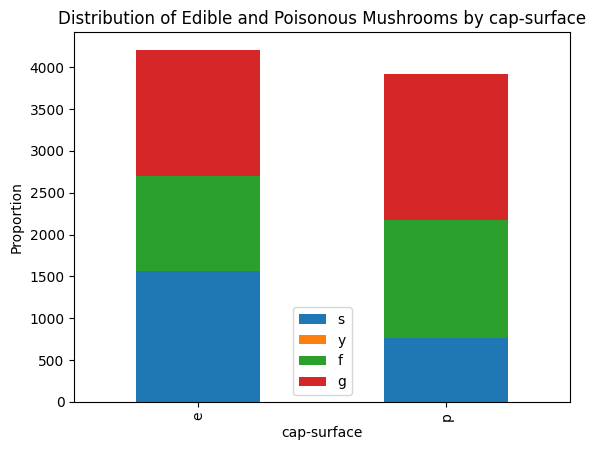

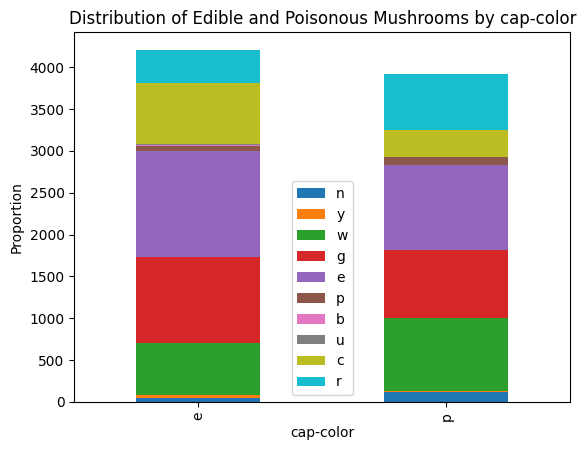

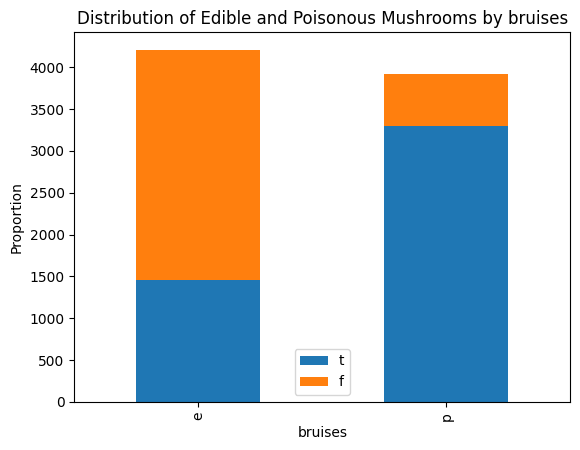

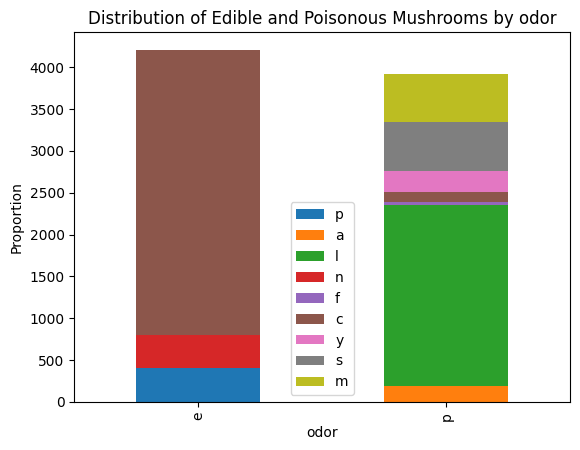

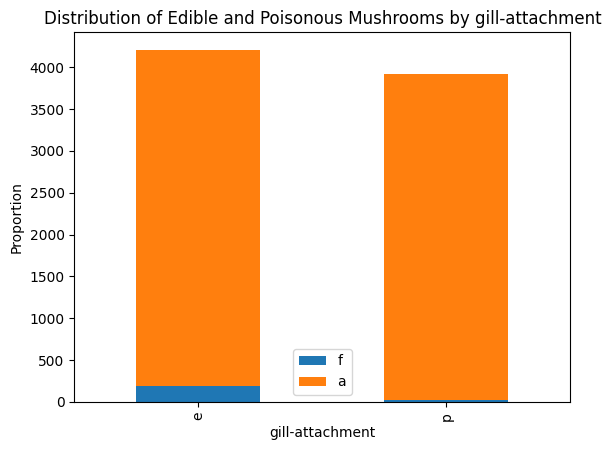

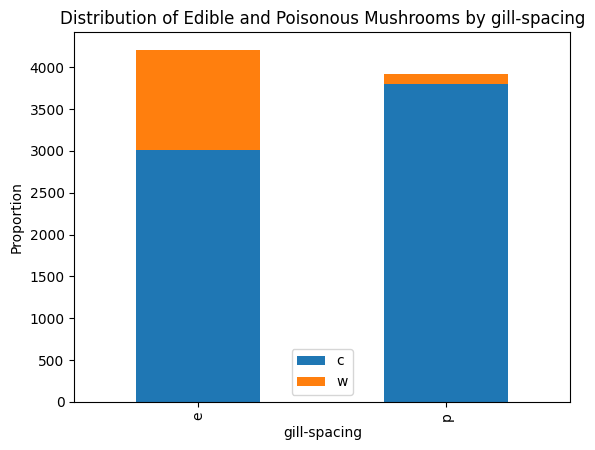

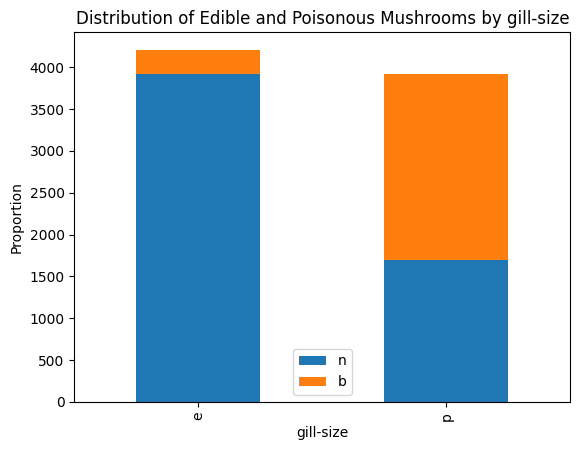

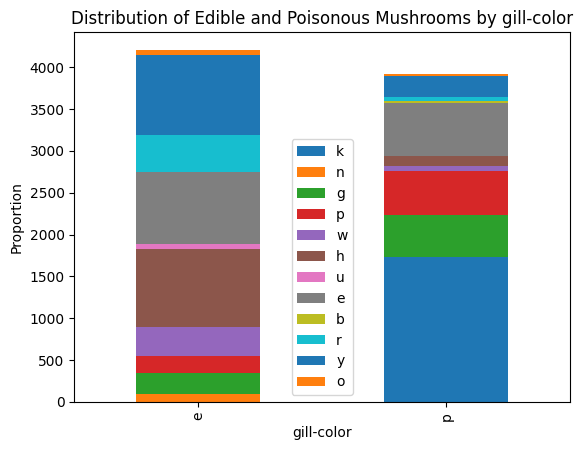

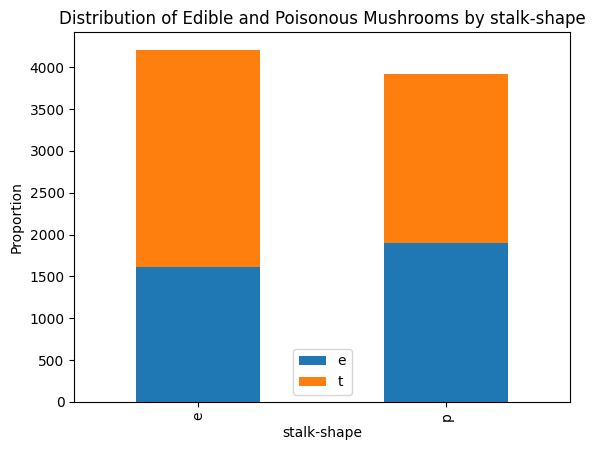

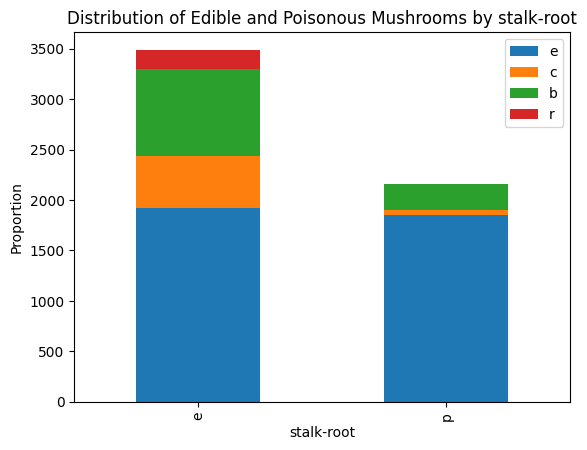

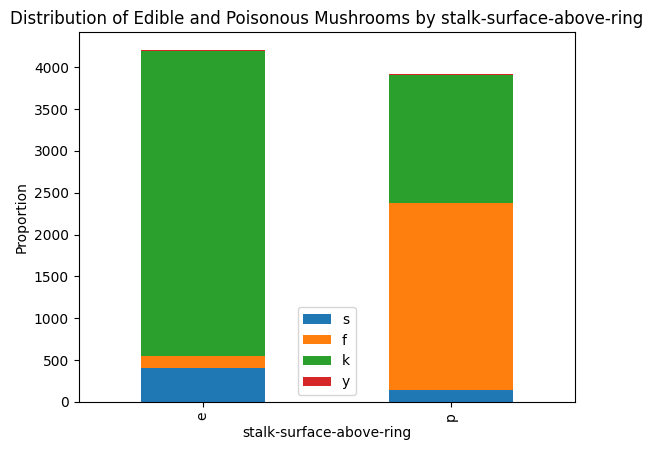

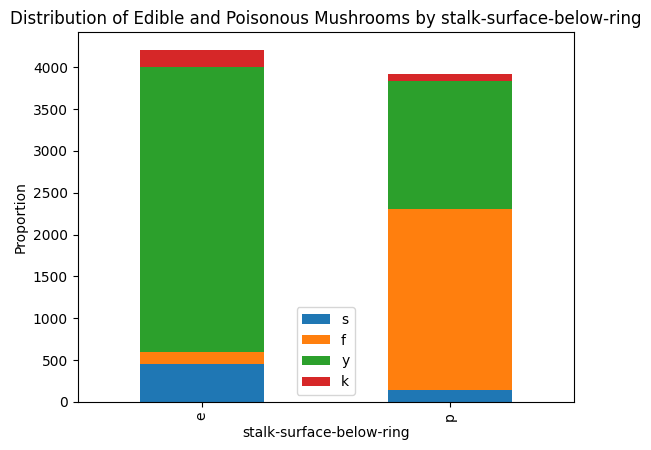

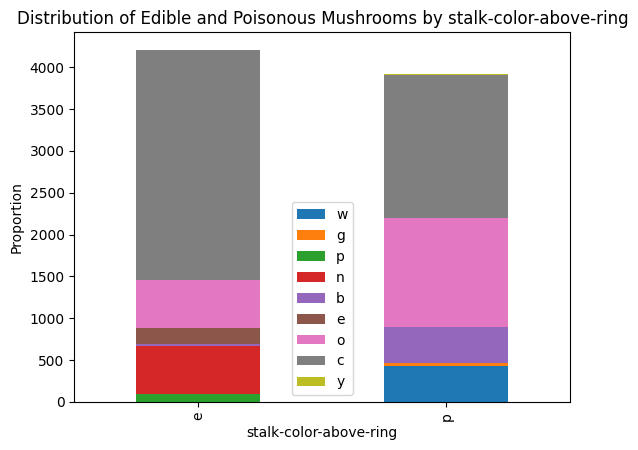

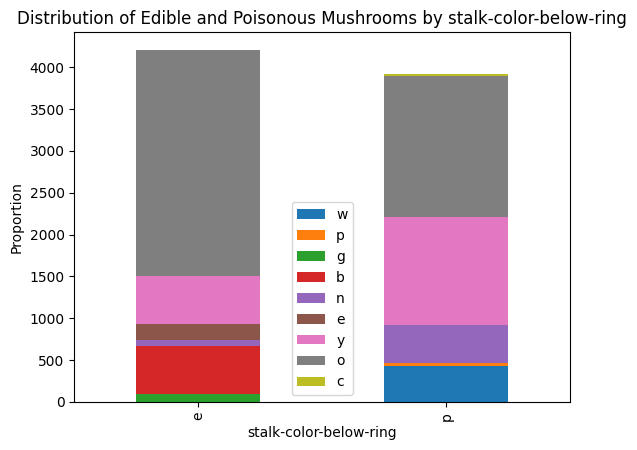

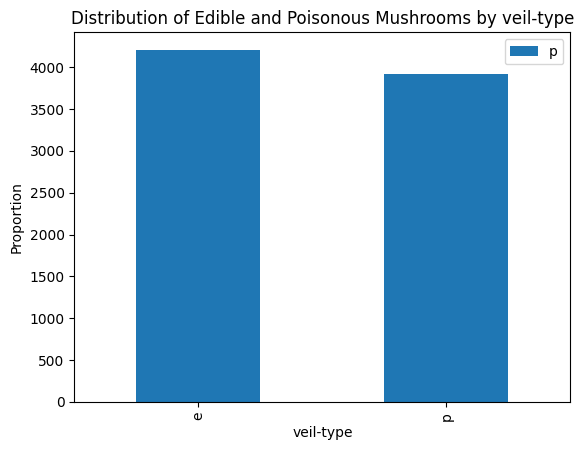

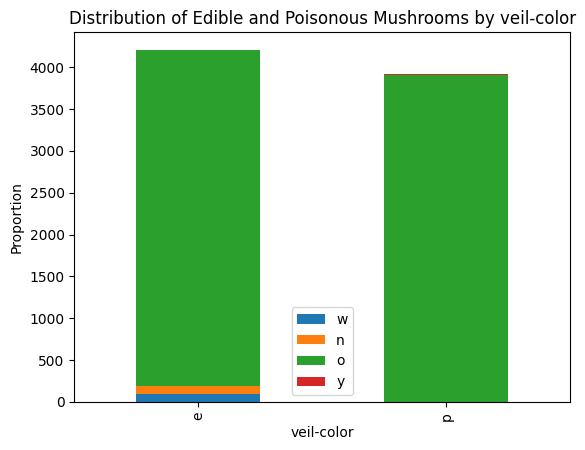

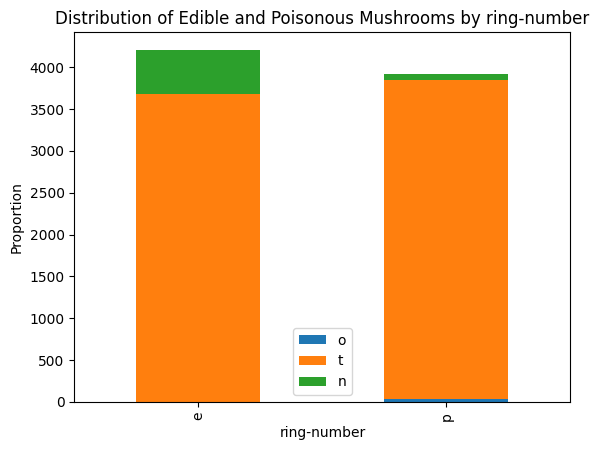

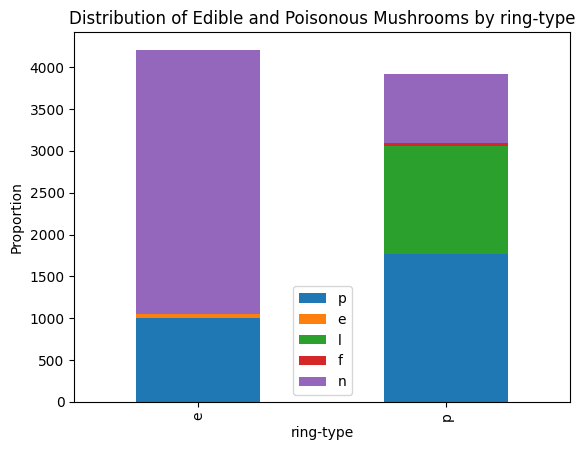

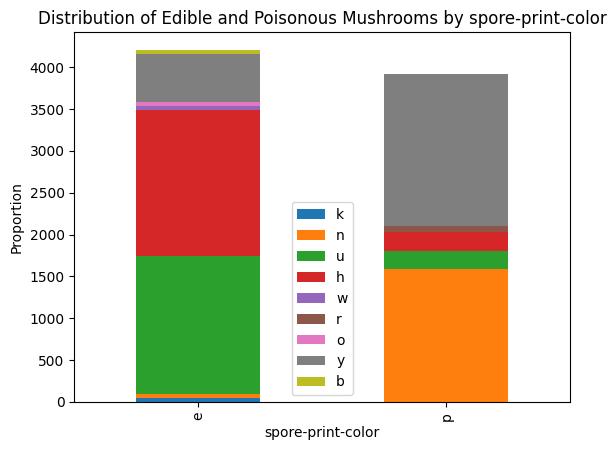

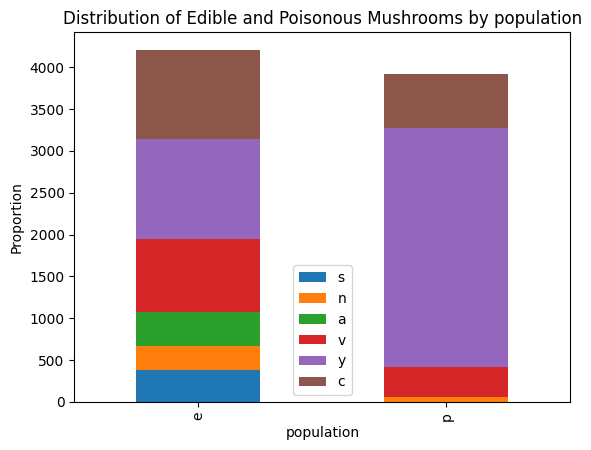

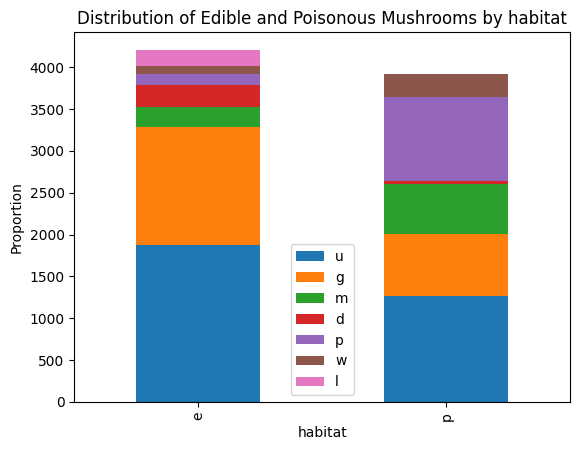

In [ ]:
# Now I will see if there is any determining factors for any of the features in terms of edibility
grouped = mushrooms.groupby(['poisonous'])

# Iterate over each feature and plot the bar graph
for feature in mushrooms.columns:
    if feature != 'poisonous':  # Skip the target variable
        feature_counts = grouped[feature].value_counts().unstack()
        feature_counts.plot(kind='bar', stacked=True)
        plt.title(f"Distribution of Edible and Poisonous Mushrooms by {feature}")
        plt.xlabel(feature)
        plt.ylabel("Proportion")
        plt.legend(mushrooms[feature].unique())
        plt.show()

In [ ]:
# testing for minimal or null amounts of each category in each target
#for feature in mushrooms.columns:
    #if feature != 'poisonous':  # Skip the target variable
        #print(f"Feature: {feature}")
        #feature_counts = grouped[feature].value_counts().unstack(fill_value=0)
        #print(feature_counts)
        #print()

The provided data on the distribution of edible and poisonous mushrooms across various features serves as a valuable resource for feature engineering and pipeline development. By examining the characteristics of mushrooms categorized by their edibility, we can identify informative features that strongly correlate with the target variable (edibility).

- __Feature Engineering__:  Feature engineering can involve transforming or combining existing features, such as encoding categorical variables or creating new features based on domain knowledge. Additionally, understanding the distribution of mushrooms across different features can inform the selection of appropriate preprocessing techniques and model architectures in the pipeline.For instance, features with significant discriminatory power between edible and poisonous mushrooms can be prioritized, while features with minimal impact can be excluded or transformed to improve model performance. Integrating this insight into the pipeline design ensures that the model can effectively distinguish between edible and poisonous mushrooms based on their characteristics, ultimately enhancing its predictive capability and generalization to unseen data.

[comment]: <> (I will check if there are small categories that can be defined to just poisonous or just edible.)

#### 2. Variation in Edibility Across Habitats:
- Which habitats tend to have a higher proportion of edible mushrooms?
- Exploring how the distribution of edible and poisonous mushrooms varies across different habitats can reveal potential patterns. Are certain habitats more likely to host edible mushrooms, and vice versa? This insight can contribute to safety considerations for mushroom foragers.

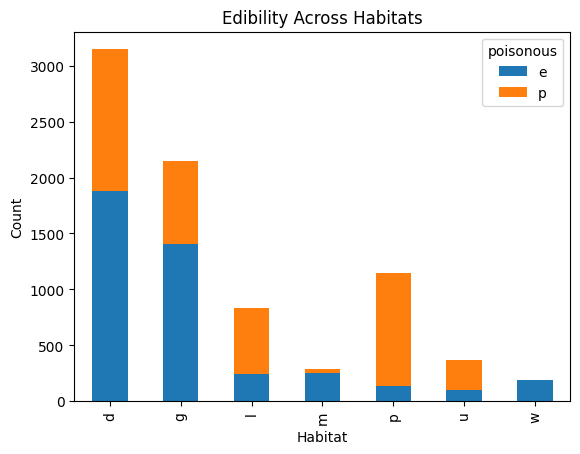

In [ ]:
# 2. Variation in Edibility Across Habitats
# Calculate the distribution of edible and poisonous mushrooms across habitats
#edibility_by_habitat = X['habitat'].value_counts().plot(kind='bar')#df.groupby(['habitat', 'class']).size().unstack().fillna(0)
y['poisonous'].groupby(X['habitat']).value_counts().unstack().plot(kind='bar', stacked=True)
#print(edibility_by_habitat)
# Plot the stacked bar chart
#edibility_by_habitat.plot(kind='bar', stacked=True)
plt.title('Edibility Across Habitats')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.show()

Waste habitats consistently have edible mushrooms, while other habitats like leaves, paths, and urban areas show a higher proportion of poisonous mushrooms. This indicates potential safety concerns in certain environments.

#### 3. Effect of Odor on Edibility:
- Are there specific odors that are more commonly associated with either edible or poisonous mushrooms?
- Investigating the correlation between the odor of mushrooms and their edibility is essential. Understanding whether certain odors are associated with either edible or poisonous mushrooms provides practical information for identification in the wild.


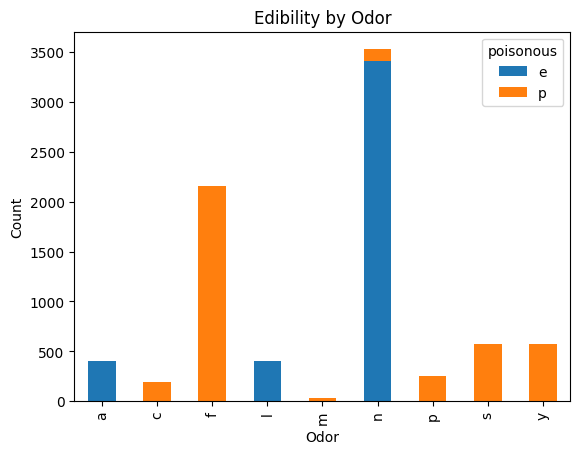

In [ ]:
# 3. Effect of Odor on Edibility
# Calculate the distribution of edible and poisonous mushrooms across odors
y['poisonous'].groupby(X['odor']).value_counts().unstack().plot(kind='bar', stacked=True)
# Plot the stacked bar chart
plt.title('Edibility by Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()

odor: a=almond l=anise c=creosote y=fishy f=foul m=musty n=none p=pungent s=spicy

Mushrooms with almond or anise scents are consistently edible, while those with foul, creosote, fishy, spicy, pungent, and musty odors are predominantly poisonous. This information is crucial for identifying mushrooms based on their smell.

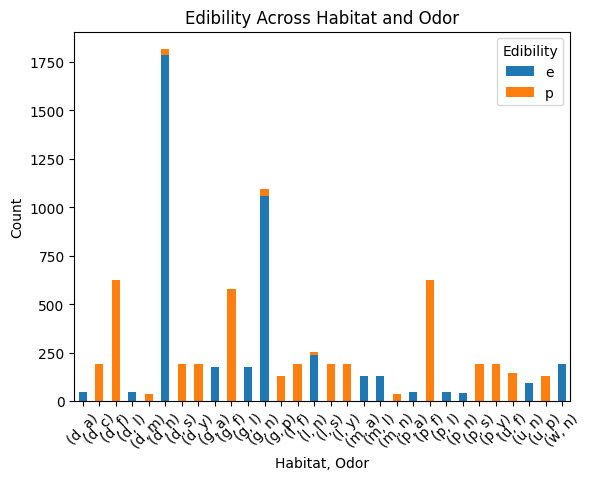

In [ ]:
# Combine 'habitat' and 'odor' into a single DataFrame
data = pd.concat([X['habitat'], X['odor'], y['poisonous']], axis=1)

# Group by 'habitat' and 'odor', then count occurrences of edibility
edibility_by_habitat_odor = data.groupby(['habitat', 'odor', 'poisonous']).size().unstack(fill_value=0)

# Plot the stacked bar chart
edibility_by_habitat_odor.plot(kind='bar', stacked=True)
plt.title('Edibility Across Habitat and Odor')
plt.xlabel('Habitat, Odor')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Edibility')  # Add legend with edibility labels
plt.show()

In [ ]:
print(edibility_by_habitat_odor)

poisonous        e    p
habitat odor           
d       a       48    0
        c        0  192
        f        0  624
        l       48    0
        m        0   36
        n     1784   32
        s        0  192
        y        0  192
g       a      176    0
        f        0  576
        l      176    0
        n     1056   36
        p        0  128
l       f        0  192
        n      240   16
        s        0  192
        y        0  192
m       a      128    0
        l      128    0
        n        0   36
p       a       48    0
        f        0  624
        l       48    0
        n       40    0
        s        0  192
        y        0  192
u       f        0  144
        n       96    0
        p        0  128
w       n      192    0


Habitat and Odor Distribution:
- Habitat and Odor Associations: The table shows how the presence of certain odors varies across different habitats. For example:

- In habitat "d" (Woods), mushrooms with odor "n" (None) are predominantly edible, while mushrooms with odors "c" (Creosote), "s" (Spicy), and "y" (Fishy) are mostly poisonous.
 - Habitat "g" (Grasses) has mushrooms with odor "f" (Foul) predominantly poisonous, while odor "a" (Almond) is associated with mostly edible mushrooms.
 - Habitat "l" (Leaves) primarily contains mushrooms with odor "n" (None), among which some are edible and some are poisonous.

- Absence of Certain Odors: Some habitats have no mushrooms with certain odors. For instance:
 - Habitat "m" (Meadows) lacks mushrooms with odor "a" (Almond), "f" (Foul), and "y" (Fishy).
 - Habitat "u" (Urban) does not have mushrooms with odor "a" (Almond) or "f" (Foul).

- Varied Distribution: The distribution of edible and poisonous mushrooms varies across habitats and odors, indicating potential associations between these factors and mushroom toxicity.

- Predictive Features: Understanding the relationships between habitat, odor, and mushroom toxicity can be valuable for predictive modeling. Features derived from these associations may contribute to the accurate classification of mushrooms as edible or poisonous.

#### 4. Population and Edibility:
- Can we identify any trends or patterns in terms of population and the likelihood of mushrooms being edible?
- Analyzing the relationship between the population of mushrooms in a specific area and their edibility can offer valuable insights. Are certain population levels indicative of a higher likelihood of mushrooms being edible, or is there no discernible pattern?


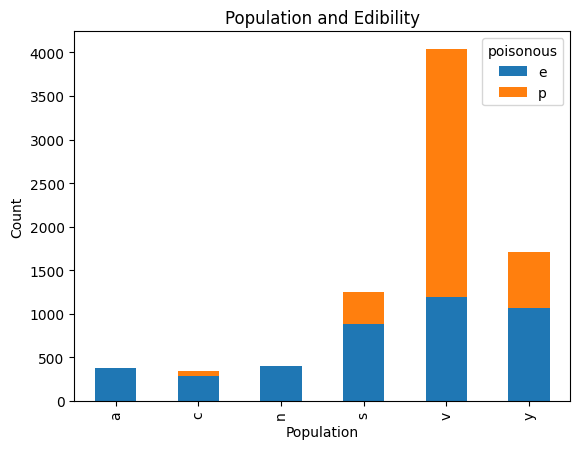

In [ ]:
# 4. Population and Edibility
# Calculate the distribution of edible and poisonous mushrooms across populations
y['poisonous'].groupby(X['population']).value_counts().unstack().plot(kind='bar', stacked=True)
# Plot the stacked bar chart
plt.title('Population and Edibility')
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

Mushrooms in abundant and numerous populations tend to be edible. However, other population categories show a mixed distribution of edible and poisonous mushrooms. This suggests a potential correlation between population levels and edibility.

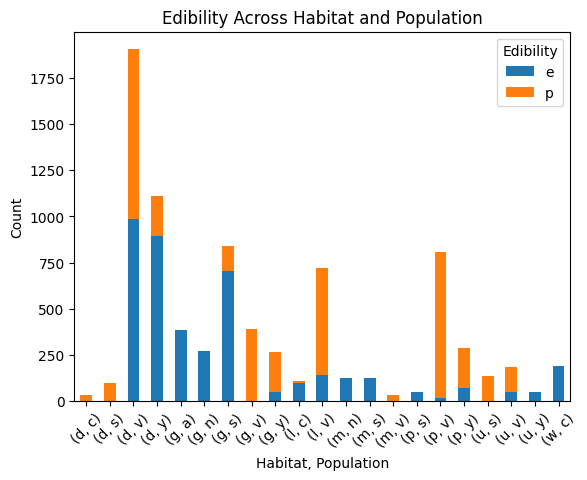

In [ ]:
# Combine 'habitat' and 'population' into a single DataFrame
data = pd.concat([X['habitat'], X['population'], y['poisonous']], axis=1)

# Group by 'habitat' and 'population', then count occurrences of edibility
edibility_by_habitat_pop = data.groupby(['habitat', 'population', 'poisonous']).size().unstack(fill_value=0)

# Plot the stacked bar chart
edibility_by_habitat_pop.plot(kind='bar', stacked=True)
plt.title('Edibility Across Habitat and Population')
plt.xlabel('Habitat, Population')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Edibility')  # Add legend with edibility labels
plt.show()

In [ ]:
print(edibility_by_habitat_pop)

poisonous             e    p
habitat population          
d       c             0   36
        s             0   96
        v           984  920
        y           896  216
g       a           384    0
        n           272    0
        s           704  136
        v             0  388
        y            48  216
l       c            96   16
        v           144  576
m       n           128    0
        s           128    0
        v             0   36
p       s            48    0
        v            16  792
        y            72  216
u       s             0  136
        v            48  136
        y            48    0
w       c           192    0


Habitat and Population Distribution:
- The data provides counts of mushrooms categorized by habitat and population. We can see how different habitats (g=grasses l=leaves m=meadows p=paths u=urban w=waste d=woods) have varying populations of mushrooms.

- Edibility Across Habitats and Populations: By examining the counts of edible (e) and poisonous (p) mushrooms within each habitat and population category, we can observe patterns in mushroom edibility across different environments. For example:

 - In habitat "d" (Woods), the majority of mushrooms in populations "v" (Several) and "y" (Solitary) are poisonous, while population "c" (Clustered) has no edible mushrooms.
 - In habitat "g" (Grasses), there are no edible mushrooms in populations "a" (Abundant) and "n" (Numerous).
 - In habitat "u" (Urban), all edible mushrooms are found in populations "v" and "y", while population "s" (Scattered) only has poisonous mushrooms.
 - In habitat "w" (Waste), all mushrooms are in population "c" are edible.

- Potential Predictive Features: The distribution of mushroom edibility across different habitat-population combinations can serve as potential predictive features for building our model. These features can help differentiate between edible and poisonous mushrooms based on their habitat and population characteristics.

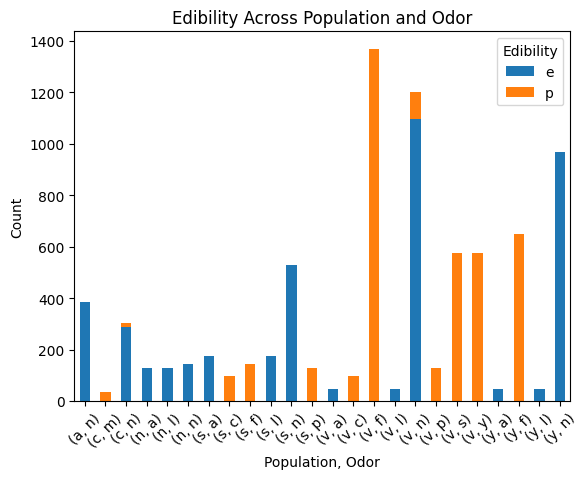

In [ ]:
# Combine 'population' and 'odor' into a single DataFrame
data = pd.concat([X['population'], X['odor'], y['poisonous']], axis=1)

# Group by 'population' and 'odor', then count occurrences of edibility
edibility_by_pop_odor = data.groupby(['population', 'odor', 'poisonous']).size().unstack(fill_value=0)

# Plot the stacked bar chart
edibility_by_pop_odor.plot(kind='bar', stacked=True)
plt.title('Edibility Across Population and Odor')
plt.xlabel('Population, Odor')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Edibility')  # Add legend with edibility labels
plt.show()

In [ ]:
print(edibility_by_pop_odor)

poisonous           e     p
population odor            
a          n      384     0
c          m        0    36
           n      288    16
n          a      128     0
           l      128     0
           n      144     0
s          a      176     0
           c        0    96
           f        0   144
           l      176     0
           n      528     0
           p        0   128
v          a       48     0
           c        0    96
           f        0  1368
           l       48     0
           n     1096   104
           p        0   128
           s        0   576
           y        0   576
y          a       48     0
           f        0   648
           l       48     0
           n      968     0


Population and Odor
- The data you provided shows the distribution of edible (e) and poisonous (p) mushrooms across different populations and odors. Here are some observations

- Edibility Across Populations and Odors: The table illustrates how mushroom edibility varies depending on both the population and odor categories.

 - Population "a" (Abundant) has only edible mushrooms for odor categories "n" (None), "l" (Anise), and "f" (Foul).
 - Population "c" (Clustered) has both edible and poisonous mushrooms, with odor "n" (None) having the highest count of edible mushrooms.
 - Population "s" (Scattered) has a mix of edible and poisonous mushrooms across various odor categories, with odor "n" (None) having the highest count of both edible and poisonous mushrooms.
 - Population "v" (Several) has a diverse distribution of mushrooms across odor categories, with odor "f" (Foul) having the highest count of poisonous mushrooms.
 - Population "y" (Solitary) mostly consists of edible mushrooms, especially in odor categories "a" (Almond) and "n" (None).

- Potential Predictive Features: The data suggests potential predictive patterns between population, odor, and mushroom edibility. Certain odor categories may be strongly associated with either edible or poisonous mushrooms within specific populations. These associations can serve as valuable features for predicting mushroom edibility in machine learning models.

### Data cleaning

Within the dataset we see that there is many missing values for stalk-root so we will remove those entries for now. We will as so remove the veil-type feature as all entries are partial so there is no determining factor in edibility with these mushrooms if we know there is no universal entries.

In [ ]:
mushrooms = mushrooms.dropna(subset=['stalk-root'])
mushrooms.shape

(5644, 23)

I am spliting the X and y sets to the categorical features and the target category (poisonous)

In [ ]:
class_column = 'poisonous'
random_seed = 2435

X_train, X_test, y_train, y_test = train_test_split(mushrooms.drop(columns=class_column), mushrooms[class_column],
                                                    test_size=0.25, random_state=random_seed, stratify=mushrooms[class_column])

In [ ]:
# X Train
print('On X train: ')
print('X train dimensions: ', X_train.shape)
display(X_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test.shape)
display(X_test.head())

On X train: 
X train dimensions:  (4233, 22)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5220,f,y,y,f,f,f,c,b,g,e,...,k,n,p,p,w,o,l,h,y,d
4061,f,f,n,t,n,f,c,b,n,t,...,s,w,w,p,w,o,p,n,y,d
5422,f,y,y,f,f,f,c,b,g,e,...,k,b,n,p,w,o,l,h,v,d
4837,x,f,y,f,f,f,c,b,g,e,...,k,n,b,p,w,o,l,h,v,p
2689,x,y,g,t,n,f,c,b,w,t,...,s,p,w,p,w,o,p,k,v,d



On X test: 
X test dimensions:  (1411, 22)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3064,x,y,y,f,f,f,c,b,g,e,...,k,n,b,p,w,o,l,h,y,p
1417,x,s,n,f,n,f,w,b,n,t,...,s,w,w,p,w,o,e,k,a,g
1218,f,f,w,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,n,a,g
3564,x,y,n,t,n,f,c,b,w,t,...,s,g,w,p,w,o,p,n,y,d
2228,x,y,g,t,n,f,c,b,p,t,...,s,g,g,p,w,o,p,k,y,d


In [ ]:
# y Train
print('On y train: ')
print('y train dimensions: ', y_train.shape)
y_train = y_train.to_frame(name='poisonous')
display(y_train.head())

# y test
print('\nOn y test: ')
print('y test dimensions: ', y_test.shape)
y_test = y_test.to_frame(name='poisonous')
display(y_test.head())

On y train: 
y train dimensions:  (4233,)


,poisonous
5220,p
4061,e
5422,p
4837,p
2689,e



On y test: 
y test dimensions:  (1411,)


,poisonous
3064,p
1417,e
1218,e
3564,e
2228,e


## Feature Engineering
In light of the Basic EDA findings, the feature engineering plan includes:

- Encode categorical variables: I will apply one-hot encoding to convert categorical features into numerical format.
- Odor feature transformation: Grouping similar odors and creating binary features for commonly occurring odors that correlate with edibility.
- Simplifying population feature: Combine population categories based on edibility distribution.
- Habitat feature modification: Consider combining or reclassifying habitats to enhance feature relevance.


###Feature engineering 'Features'
1. __Combine Habitat and Odor Features__: We can create new features by combining habitat and odor information. For example, we can create binary variables indicating the presence or absence of specific odor-habitat combinations.
2. __Combine Population and Habitat__: Create new features by combining information about population and habitat. We can encode these combinations as categorical variables or derive numerical representations that capture the joint influence of population and habitat on mushroom toxicity.
3. __Combine Population and Odor__: Similarly, generate new features by combining population and odor attributes. Explore different combinations and encoding schemes to represent the joint effects of population and odor on mushroom toxicity.
4. __Interaction Terms for Population-Habitat and Population-Odor__: Investigate potential interactions between population and habitat, as well as population and odor. These interactions may reveal synergistic or antagonistic relationships that affect mushroom toxicity.
5. __Target Encodingv: Encode categorical variables based on the target variable's mean or frequency within each category. This can provide valuable information about how each category relates to the target variable.
6. __Frequency Encoding__: Encode categorical variables based on their frequency or count within the dataset. This can help capture the importance of each category relative to others.
7. __Handling Rare Categories__: Identify and handle rare categories by either grouping them into a single category or encoding them separately to prevent overfitting.
8. __Validation and Evaluation__: Validate the effectiveness of the new features by evaluating their impact on model performance through cross-validation or holdout validation. Monitor metrics such as accuracy, precision, recall, and F1-score to assess the contribution of the engineered features.


###Establish an Initial Pipeline
The initial pipeline will involve:

- Imputation: Handling any missing values using an imputer.
- Column Transformation: Utilizing a column transformer to apply different preprocessing steps to different subsets of features.


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

### Making the Training Pipeline and trying Linear Regession

Establish our training pipeline for our model. We will also impute this missing stalk-root values that are missing from the data set, and encode categorical values.

In [ ]:
cat_pipeline = Pipeline(steps=[
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('onehot_cat', OneHotEncoder())
  ])

In [ ]:
cat_features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color',
                'ring-number', 'ring-type', 'spore-print-color',
                'population', 'habitat']

preproc = ColumnTransformer([('cat_pipe', cat_pipeline, cat_features)],
                            remainder='passthrough')

In [ ]:
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

# visualization of the pipeline
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-type', 'veil-color',
                                                   'ring-number', 'ring-type',
                                                   'spore-print-color',
                                                   'population',
                                                   'habitat'])])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

In [ ]:
tuning_grid = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }

# y = f1(x): f1 = 1.2x1 + 2.5x2 + 3.1x3 + 10
# y = f2(x): f2 = -1.2x1 + 0.5x2 + 3.1x3 + 10
# TODO: choose your cv folds
grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True, n_jobs=-1)

In [ ]:
tuning_grid

{'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06])}

In [ ]:
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         ['cap-shape',
                                                                          'cap-surface',
                                                                          'cap-color',
                                                                          'bruises',
                                                                          'odor',
                                                                          'gill-attachment',
                                                                          'gill-spacing',
                                                                          'gill-size',
                                                                          'gill-color',
                                                                          'stalk-sh...
                                                                          'stalk-color-below-ring',
                                                                          'veil-type',
                                                                          'veil-color',
                                                                          'ring-number',
                                                                          'ring-type',
                                                                          'spore-print-color',
                                                                          'population',
                                                                          'habitat'])])),
                                       ('mdl',
                                        LogisticRegression(penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             n_jobs=-1,
             param_grid={'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
                         'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
             return_train_score=True)

In [ ]:
print(grid_search.best_score_)
grid_search.best_params_

1.0


{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.0}

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__C,param_mdl__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.109309,0.011791,0.019940,0.001932,0.1,0.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.0}",0.996458,0.998819,0.998819,...,0.997874,0.001737,13,0.998523,0.998819,0.998228,0.998229,0.998819,0.998524,0.000264
1,0.113790,0.000832,0.019787,0.001698,0.1,0.25,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.25}",0.996458,0.998819,1.000000,...,0.998346,0.001602,11,0.998819,0.998228,0.997933,0.998819,0.997933,0.998346,0.000401
2,0.131467,0.012080,0.023236,0.003397,0.1,0.5,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.5}",0.996458,0.998819,1.000000,...,0.998346,0.001602,11,0.998819,0.998228,0.997933,0.998819,0.997933,0.998346,0.000401
3,0.212055,0.035952,0.035042,0.011917,0.1,0.75,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.75}",0.996458,0.997639,0.998819,...,0.997638,0.001671,14,0.997933,0.997637,0.997342,0.998229,0.997933,0.997815,0.000301
4,0.332582,0.039198,0.040516,0.004256,0.1,1.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 1.0}",0.996458,0.997639,0.998819,...,0.997638,0.001671,14,0.997933,0.997637,0.997342,0.998229,0.997048,0.997638,0.000418
5,0.172954,0.041044,0.028870,0.006610,316.227766,0.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",1.000000,1.000000,1.000000,...,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.207824,0.064679,0.019672,0.000790,316.227766,0.25,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",1.000000,1.000000,1.000000,...,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.182088,0.006731,0.019689,0.000506,316.227766,0.5,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",1.000000,1.000000,1.000000,...,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.181919,0.005979,0.019560,0.001175,316.227766,0.75,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",1.000000,1.000000,1.000000,...,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.179956,0.008436,0.020511,0.001881,316.227766,1.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",1.000000,1.000000,1.000000,...,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-type', 'veil-color',
                                                   'ring-number', 'ring-type',
                                                   'spore-print-color',
                                                   'population',
                                                   'habitat'])])),
                ('mdl',
                 LogisticRegression(C=316.22776601683796, l1_ratio=0.0,
                                    penalty='elasticnet', solver='saga',
                                    tol=0.01))])

In [ ]:
grid_search.classes_

array(['e', 'p'], dtype=object)

In [ ]:
# Get the weights of our features used in the best model (estimator)
coefs = grid_search.best_estimator_['mdl'].coef_[0]
coefs

array([ 0.40187191,  0.37502084,  0.22266724, -0.00639299, -0.75544826,
        0.16483919, -1.40090688,  0.78508419,  0.56299135,  0.45538928,
        1.50524731, -0.98347532, -0.69602387,  0.2199641 , -0.75439811,
        1.07134435,  0.60730481, -0.56740533,  0.12504778,  0.27751015,
       -3.25305516,  2.93161702,  3.77861637, -3.2519948 ,  0.59552817,
       -4.20857965,  3.81042599,  0.32273752,  0.07982041,  0.95646536,
       -0.55390743, -2.17024211,  2.57280004, -0.02526971,  0.49901448,
       -0.61211312, -0.5359744 , -0.07697427,  0.86185523,  0.28785978,
       -0.41552124,  0.41968119,  2.70474222, -2.30218429,  2.88607724,
       -1.62498604,  0.19696738, -1.05550066, -0.75998083,  1.83248081,
       -1.25948679,  0.58954475, -0.26048302,  1.23695265, -0.70348394,
        0.12957225,  0.653825  ,  0.59552817, -0.61053143, -0.3433938 ,
       -0.35843647, -0.83605903,  1.3016255 ,  0.32156377,  0.59552817,
       -0.7855509 , -1.5909276 , -0.45679562,  1.01711461,  1.30

In [ ]:
grid_search.best_estimator_.named_steps['preproc'].transformers_

[('cat_pipe',
  Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                  ('onehot_cat', OneHotEncoder())]),
  ['cap-shape',
   'cap-surface',
   'cap-color',
   'bruises',
   'odor',
   'gill-attachment',
   'gill-spacing',
   'gill-size',
   'gill-color',
   'stalk-shape',
   'stalk-root',
   'stalk-surface-above-ring',
   'stalk-surface-below-ring',
   'stalk-color-above-ring',
   'stalk-color-below-ring',
   'veil-type',
   'veil-color',
   'ring-number',
   'ring-type',
   'spore-print-color',
   'population',
   'habitat'])]

In [ ]:
# get back the categorical features' original categories - recall that index 0 had the cat_pipe
cat_names = grid_search.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'feature_imp': coefs})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['feature_imp']),
                             coef_sign = np.sign(coef_info['feature_imp']))

# sort the coef_info dataframe and plot with a barplot!
coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);

In [ ]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test))) # prediction on test set

In [ ]:
cm = confusion_matrix(y_test, grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

As we can see from these results I will need to reevaluate the data. I will first reevalidate the split. I also do no think this is the correct model for this project. I will try to use the CategoricalNB model next to test for predictibility.

### CategoricalNB pipeline and model

In [ ]:
cat_features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color',
                'ring-number', 'ring-type', 'spore-print-color',
                'population', 'habitat']

# Define the preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('label_encoder', ColumnTransformer(
        transformers=[
            ('encoder', LabelEncoder(), cat_features)  # Integer encoding for categorical features
        ]
    ))
])
# Define the preprocessing steps for the target variable
target_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoder())  # Integer encoding for target variable
])

display(categorical_transformer)
display(target_transformer)

Pipeline(steps=[('label_encoder',
                 ColumnTransformer(transformers=[('encoder', LabelEncoder(),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-type', 'veil-color',
                                                   'ring-number', 'ring-type',
                                                   'spore-print-color',
                                                   'population',
                                                   'habitat'])]))])

Pipeline(steps=[('label_encoder', LabelEncoder())])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('onehot_encoder', ColumnTransformer(
        transformers=[
            ('encoder', OneHotEncoder(drop='if_binary'), cat_features)  # One-hot encoding for categorical features
        ],
        remainder='passthrough'  # Remainder columns will be passed through without any transformations
    ))
])

In [ ]:
preproc = ColumnTransformer(transformers=[('cat', categorical_transformer, cat_features), ('target', target_transformer, ['poisonous'])])

In [ ]:
# Define the pipeline with preprocessing and OneHotEncoder and model
pipeline = Pipeline(steps=[
    ('preprocessor', preproc),  # Preprocessing steps
    ('model', CategoricalNB())
])


with config_context(display='diagram'):
    display(pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot_encoder',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('encoder',
                                                                                                    OneHotEncoder(drop='if_binary'),
                                                                                                    ['cap-shape',
                                                                                                     'cap-surface',
                                                                                                     'cap-color',
                                                                                                     'bruises',
                                                                                                     'odor',
                                                                                                     'gill-attachment',
                                                                                                     'gill-spacing',
                                                                                                     'gill-size',
                                                                                                     'gill-color',
                                                                                                     'stalk-shape',
                                                                                                     'stalk-root',
                                                                                                     'stal...
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-type', 'veil-color',
                                                   'ring-number', 'ring-type',
                                                   'spore-print-color',
                                                   'population', 'habitat']),
                                                 ('target',
                                                  Pipeline(steps=[('label_encoder',
                                                                   LabelEncoder())]),
                                                  ['poisonous'])])),
                ('model', CategoricalNB())])

In [ ]:
display(y_train.head())

5220    p
4061    e
5422    p
4837    p
2689    e
Name: poisonous, dtype: object

In [ ]:
print(pipeline.steps)

[('preprocessor', ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot_encoder',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('encoder',
                                                                                   OneHotEncoder(drop='if_binary'),
                                                                                   ['cap-shape',
                                                                                    'cap-surface',
                                                                                    'cap-color',
                                                                                    'bruises',
                                                                                    'odor',
                                                                                    'gill-a

In [ ]:
print(pipeline.named_steps["preprocessor"])

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot_encoder',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('encoder',
                                                                                   OneHotEncoder(drop='if_binary'),
                                                                                   ['cap-shape',
                                                                                    'cap-surface',
                                                                                    'cap-color',
                                                                                    'bruises',
                                                                                    'odor',
                                                                                    'gill-attachment',
      

In [ ]:
print(pipeline.transfomers_)

AttributeError: 'Pipeline' object has no attribute 'transfomers_'

In [ ]:
pipeline.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe